Database Connection

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
db_config = {
    'user': 'root',
    'password': 'qwerty123',
    'host': 'localhost',
    'database': 'med_cost'
}

In [3]:
conn = mysql.connector.connect(**db_config)

In [4]:
connection_string = f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"
engine = create_engine(connection_string)

In [5]:
query = "SELECT * FROM insurance"

In [6]:
df = pd.read_sql(query, engine)

Dataset Info

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.90
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.50
4,32,male,28.880,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.50
1334,18,female,31.920,0,no,northeast,2205.98
1335,18,female,36.850,0,no,southeast,1629.83
1336,21,female,25.800,0,no,southwest,2007.94


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.90
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.50
4,32,male,28.880,0,no,northwest,3866.86


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Gender Count

Text(0, 0.5, 'Count')

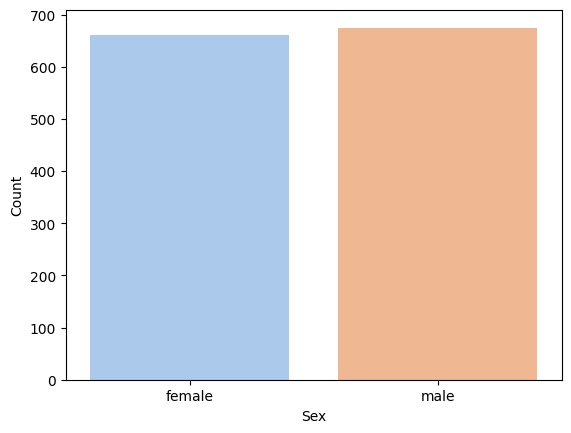

In [14]:
gender_counts = df['sex'].value_counts()
sns.countplot(x='sex', data=df, palette='pastel', hue='sex', dodge=False, legend=False)
plt.xlabel('Sex')
plt.ylabel('Count')

Smokers vs Non-smokers

Text(0, 0.5, 'Count')

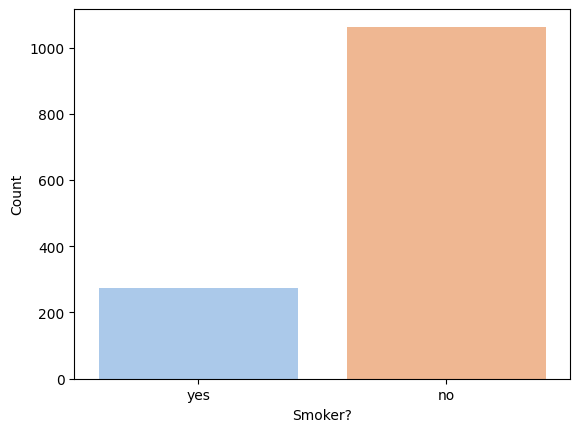

In [15]:
gender_counts = df['smoker'].value_counts()
sns.countplot(x='smoker', data=df, palette='pastel', hue='smoker', dodge=False, legend=False)
plt.xlabel('Smoker?')
plt.ylabel('Count')

Age Distribution

Text(0, 0.5, 'Frequency')

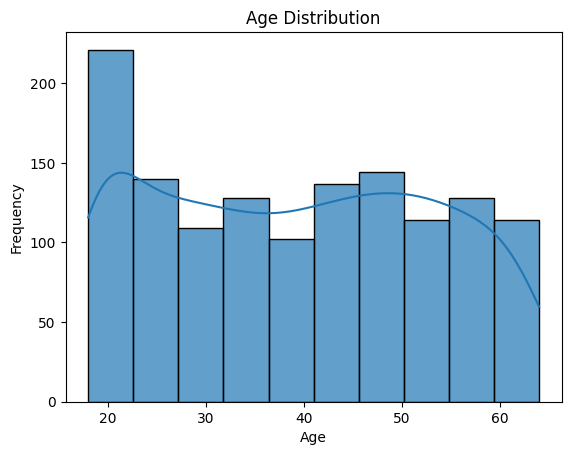

In [16]:
sns.histplot(df['age'], bins=10, kde=True, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

BMI Distribution

Text(0, 0.5, 'Frequency')

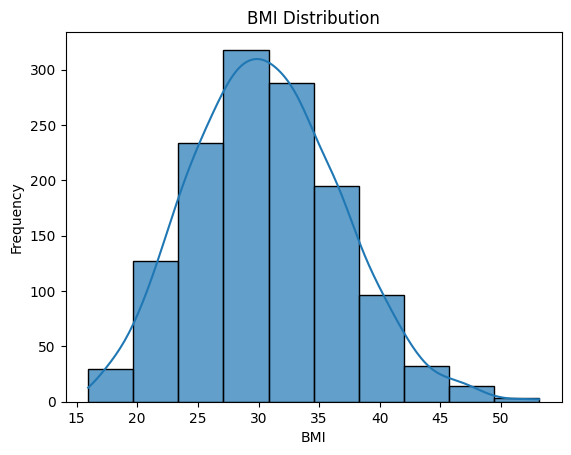

In [17]:
sns.histplot(df['bmi'], bins=10, kde=True, edgecolor='black', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Region Distribution

Text(0, 0.5, 'Count')

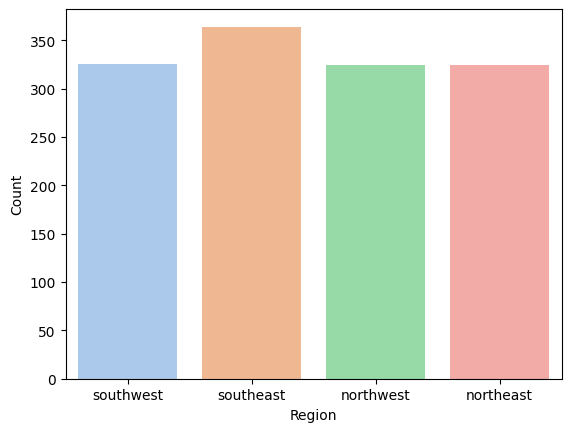

In [18]:
gender_counts = df['region'].value_counts()
sns.countplot(x='region', data=df, palette='pastel', hue='region', dodge=False, legend=False)
plt.xlabel('Region')
plt.ylabel('Count')

Unique Categories

In [19]:
object_columns = df.select_dtypes(include='object')

for col in object_columns.columns:
    print('Feature: ', col, '\t', 'Unique Values: ', object_columns[col].unique())

Feature:  sex 	 Unique Values:  ['female' 'male']
Feature:  smoker 	 Unique Values:  ['yes' 'no']
Feature:  region 	 Unique Values:  ['southwest' 'southeast' 'northwest' 'northeast']
